# Predicting Stock Prices with LSTM and GRU

# 1. Use with LSTM

## Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

## 1.1. Read file

In [3]:
# # Path of csv data file
# start='2001-01-01'
# end='2024-04-19'

# tcs=yf.download('tcs.ns',start,end,interval='1d')
# tcs.to_csv(f'/home/ganesh/Projects/BE_Project/stock_price_prediction/data/tcs.csv')

df = pd.read_csv('/home/ganesh/Projects/BE_Project/stock_price_prediction/data/tcs.csv')

# Show
print(df)
df

            Date         Open         High          Low        Close  \
0     2002-08-12    38.724998    40.000000    38.724998    39.700001   
1     2002-08-13    39.750000    40.387501    38.875000    39.162498   
2     2002-08-14    39.250000    39.250000    35.724998    36.462502   
3     2002-08-15    36.462502    36.462502    36.462502    36.462502   
4     2002-08-16    36.275002    38.000000    35.750000    36.375000   
...          ...          ...          ...          ...          ...   
5378  2024-04-10  3956.399902  3990.199951  3918.000000  3984.649902   
5379  2024-04-12  3971.000000  4013.350098  3945.500000  4001.399902   
5380  2024-04-15  4001.399902  4064.199951  3919.050049  3941.199951   
5381  2024-04-16  3902.000000  3928.699951  3862.850098  3872.800049   
5382  2024-04-18  3876.800049  3936.000000  3850.000000  3862.000000   

        Adj Close   Volume  
0       28.121292   212976  
1       27.740557   153576  
2       25.828011   822776  
3       25.828011  

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.121292,212976
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.740557,153576
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.828011,822776
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.828011,0
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.766033,811856
...,...,...,...,...,...,...,...
5378,2024-04-10,3956.399902,3990.199951,3918.000000,3984.649902,3984.649902,2101965
5379,2024-04-12,3971.000000,4013.350098,3945.500000,4001.399902,4001.399902,4354821
5380,2024-04-15,4001.399902,4064.199951,3919.050049,3941.199951,3941.199951,4200329
5381,2024-04-16,3902.000000,3928.699951,3862.850098,3872.800049,3872.800049,3051420


In [4]:
# Information column
df.info()
# Size data
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5383 entries, 0 to 5382
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       5383 non-null   object 
 1   Open       5383 non-null   float64
 2   High       5383 non-null   float64
 3   Low        5383 non-null   float64
 4   Close      5383 non-null   float64
 5   Adj Close  5383 non-null   float64
 6   Volume     5383 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 294.5+ KB


(5383, 7)

In [5]:
# Statistics such as min (minimum value), max (maximum value), mean (average value), std (standard deviation), and percentiles (25%, 50%, 75%)
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,5383.000000,5383.000000,5383.000000,5383.000000,5383.000000,5.383000e+03
mean,1196.048987,1208.374168,1182.953161,1195.567123,1080.082522,3.195786e+06
std,1147.694492,1157.687791,1137.166686,1147.412594,1121.725309,3.131023e+06
min,32.474998,36.450001,32.474998,35.474998,25.128519,0.000000e+00
25%,240.000000,243.750000,234.875000,238.943748,173.983749,1.645141e+06
50%,749.000000,758.349976,742.549988,749.700012,602.236328,2.500816e+06
75%,1912.000000,1938.200012,1891.049988,1911.074951,1715.660095,3.950456e+06
max,4215.250000,4254.750000,4177.000000,4219.250000,4219.250000,8.806715e+07


## 1.2. Data Visualization

In [6]:
# Moving Average Indicators
df['MA50'] = df['Close'].rolling(50).mean()
df['MA250'] = df['Close'].rolling(250).mean()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,MA50,MA250
0,2002-08-12,38.724998,40.000000,38.724998,39.700001,28.121292,212976,NaN,NaN
1,2002-08-13,39.750000,40.387501,38.875000,39.162498,27.740557,153576,NaN,NaN
2,2002-08-14,39.250000,39.250000,35.724998,36.462502,25.828011,822776,NaN,NaN
3,2002-08-15,36.462502,36.462502,36.462502,36.462502,25.828011,0,NaN,NaN
4,2002-08-16,36.275002,38.000000,35.750000,36.375000,25.766033,811856,NaN,NaN


In [7]:
days = df['Date']

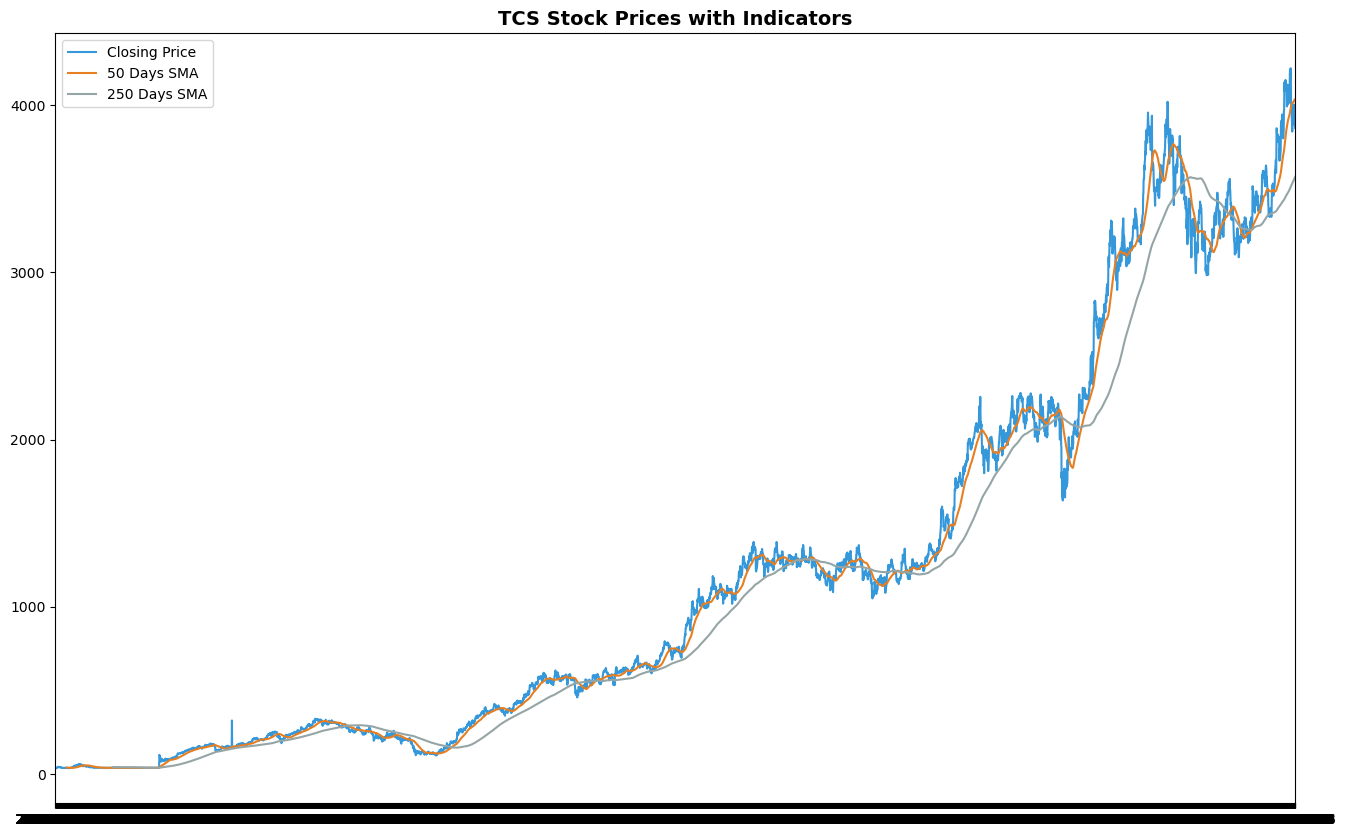

In [8]:
# Create a new image with set dimensions
plt.figure(figsize=(16,10))
# Draw a stock price graph
plt.plot(days, df['Close'], label="Closing Price", color="#3498db")
# Plot the 50-day moving average
plt.plot(days, df['MA50'], label="50 Days SMA", color="#e67e22")
# Plot the 50-day moving average
plt.plot(days, df['MA250'], label="250 Days SMA", color="#95a5a6")
# Set a title for the chart
plt.title("TCS Stock Prices with Indicators", fontsize=14, fontweight="semibold")
# Set x-axis limits
plt.xlim([days.min(), days.max()])
plt.legend()
# Show
plt.show()


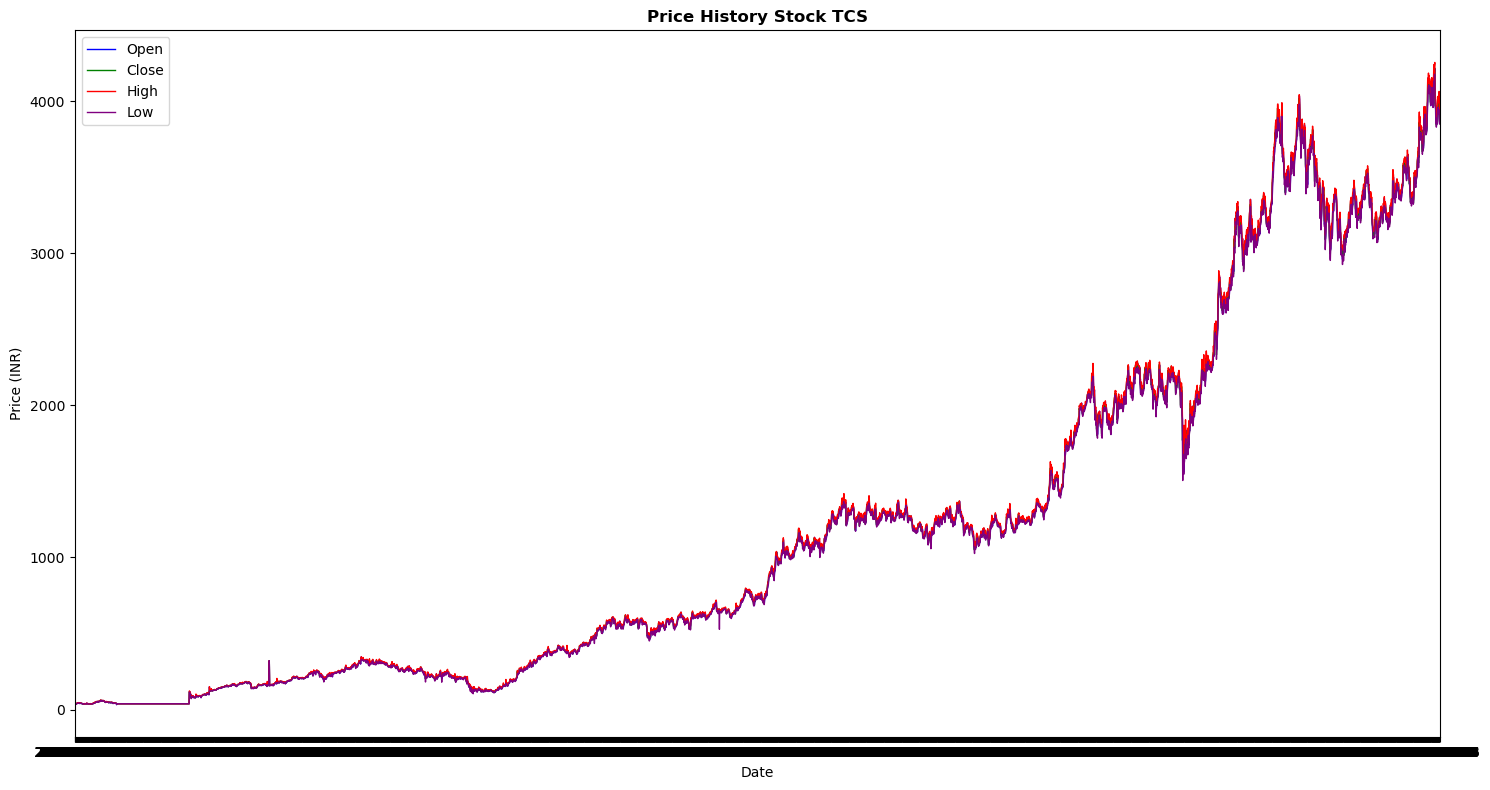

In [9]:

plt.figure(figsize=(15, 8))

# Draw a stock price chart over time
plt.plot(days, df['Open'], linestyle='-', color='blue', label='Open', linewidth=1)
plt.plot(days, df['Close'], linestyle='-', color='green', label='Close', linewidth=1)
plt.plot(days, df['High'], linestyle='-', color='red', label='High', linewidth=1)
plt.plot(days, df['Low'], linestyle='-', color='purple', label='Low', linewidth=1)

plt.title('Price History Stock TCS', fontweight="semibold")
plt.xlabel('Date')
plt.ylabel('Price (INR)')

plt.xlim([days.min(), days.max()])
plt.legend()
plt.tight_layout()

plt.show()


## 1.3. Data preprocessing

In [10]:
target_data = df[['Close']]
target_data.head()

,Close
0,39.700001
1,39.162498
2,36.462502
3,36.462502
4,36.375000


In [11]:
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Normalize data to the range [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
target_data_sc = scaler.fit_transform(target_data)

In [13]:
target_data_sc

array([[1.00985409e-03],
       [8.81381049e-04],
       [2.36031587e-04],
       ...,
       [9.33540869e-01],
       [9.17192021e-01],
       [9.14610609e-01]])

## 1.4. Create training set and testing set

In [14]:
# Create training set

test_len  = 60
train_len = target_data_sc.shape[0] - test_len
timesteps = 60
features  = 1

X_train = []
y_train = []

for i in range(timesteps, train_len):
  X_train.append(target_data_sc[i-timesteps:i, :])
  y_train.append(target_data_sc[i, :])

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train.shape, y_train.shape)

(5263, 60, 1) (5263, 1)


In [36]:
y_train

array([[4.21270446e-04],
       [3.25663558e-04],
       [3.25663558e-04],
       ...,
       [9.19582207e-01],
       [9.24601598e-01],
       [9.14443308e-01]])

In [15]:
# Create testing set

X_test = []
y_test = []

for i in range(train_len, target_data_sc.shape[0]):
  X_test.append(target_data_sc[i-timesteps:i, :])
  y_test.append(target_data_sc[i, :])

X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

print(X_test.shape, y_test.shape)

# Reshaping
# X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# print(X_test.shape, y_test.shape)

(60, 60, 1) (60, 1)


## 1.5. Build model LSTM

In [16]:
from keras.models import Sequential
import matplotlib.dates as mdates
from keras.layers import Dense, LSTM,Dropout
from keras.optimizers import SGD

2024-04-20 04:52:34.619679: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
# Initialising the RNN
model_LSTM = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
model_LSTM.add(LSTM(50, return_sequences = True, input_shape = (X_train.shape[1], 1),activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, return_sequences = True, activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, return_sequences = True, activation='tanh'))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(LSTM(50, activation='tanh'))
model_LSTM.add(Dropout(0.2))

model_LSTM.add(Dense(25))
model_LSTM.add(Dropout(0.2))
model_LSTM.add(Dense(1))


optimizer=SGD(learning_rate=0.01, momentum=0.9)

model_LSTM.compile(optimizer = 'Adam', loss = 'mean_squared_error')

2024-04-20 04:52:38.260545: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-04-20 04:52:39.075313: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 04:52:39.078579: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 04:52:39.0

In [18]:
model_LSTM.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10


2024-04-20 04:52:40.822954: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 04:52:40.826031: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 04:52:40.828378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

165/165 [==============================] - 78s 397ms/step - loss: 0.0077
Epoch 2/10
165/165 [==============================] - 66s 396ms/step - loss: 0.0034
Epoch 3/10
165/165 [==============================] - 57s 344ms/step - loss: 0.0030
Epoch 4/10
165/165 [==============================] - 66s 396ms/step - loss: 0.0027
Epoch 5/10
165/165 [==============================] - 80s 486ms/step - loss: 0.0025
Epoch 6/10
165/165 [==============================] - 81s 488ms/step - loss: 0.0025
Epoch 7/10
165/165 [==============================] - 71s 431ms/step - loss: 0.0021
Epoch 8/10
165/165 [==============================] - 69s 419ms/step - loss: 0.0021
Epoch 9/10
165/165 [==============================] - 65s 398ms/step - loss: 0.0023
Epoch 10/10
165/165 [==============================] - 71s 431ms/step - loss: 0.0021


In [38]:
model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 dropout (Dropout)           (None, 60, 50)            0         
                                                                 
 lstm_1 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_1 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_2 (LSTM)               (None, 60, 50)            20200     
                                                                 
 dropout_2 (Dropout)         (None, 60, 50)            0         
                                                                 
 lstm_3 (LSTM)               (None, 50)                2

In [19]:
y_pred_LSTM = model_LSTM.predict(X_test)
y_pred_LSTM = scaler.inverse_transform(y_pred_LSTM)
y_test_LSTM = scaler.inverse_transform(y_test)

2024-04-20 05:05:12.964103: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 05:05:12.968169: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 05:05:12.971479: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 4s 95ms/step


## 1.6. Results of using LSTM model

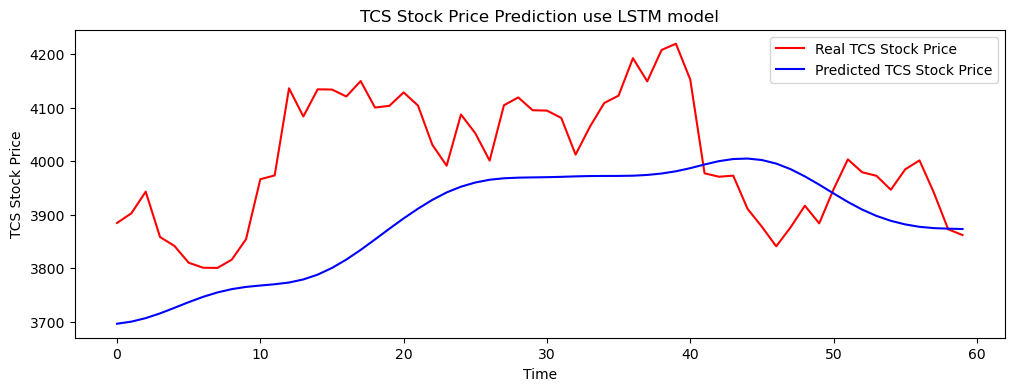

In [33]:
# Visualising the results
plt.figure(figsize=(12,4))
plt.plot(y_test_LSTM, color = 'red', label = 'Real TCS Stock Price')
plt.plot(y_pred_LSTM, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction use LSTM model')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

In [40]:
model_LSTM.save("/home/ganesh/Projects/BE_Project/stock_price_prediction/models/lstm.keras")

## 1.7. Evaluate LSTM model

In [21]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_LSTM - y_test_LSTM) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_LSTM - y_pred_LSTM) / y_test_LSTM))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 165.0350605879636
Mean Absolute Percentage Error (MAPE): 0.034032515045699485


# 2. Use with GRU model

LSTM model provides short term prediction while GRU model predicts the medium term

## 2.1. Build GRU model

In [22]:
from keras.layers import GRU

In [23]:
# The GRU architecture
model_GRU = Sequential()
# First GRU layer with Dropout regularisation
model_GRU.add(GRU(50, return_sequences=True, input_shape=(X_train.shape[1],1), activation='tanh'))
model_GRU.add(Dropout(0.2))
# Second GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Third GRU layer
model_GRU.add(GRU(50, return_sequences=True, activation='tanh'))
model_GRU.add(Dropout(0.2))
# Fourth GRU layer
model_GRU.add(GRU(50, activation='tanh'))
model_GRU.add(Dropout(0.2))
# The output layer
model_GRU.add(Dense(1))


2024-04-20 05:05:17.044069: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 05:05:17.047703: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 05:05:17.051421: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [24]:
optimizer=SGD(learning_rate=0.01, momentum=0.9)

In [25]:
# Compiling model
model_GRU.compile(optimizer= optimizer,loss='mean_squared_error')
# Fitting to the training set
model_GRU.fit(X_train,y_train,epochs=50,batch_size=150)

Epoch 1/50


2024-04-20 05:05:18.687323: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 05:05:18.690771: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 05:05:18.694015: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

36/36 [==============================] - 38s 683ms/step - loss: 0.0542
Epoch 2/50
36/36 [==============================] - 23s 635ms/step - loss: 0.0043
Epoch 3/50
36/36 [==============================] - 26s 718ms/step - loss: 0.0023
Epoch 4/50
36/36 [==============================] - 25s 681ms/step - loss: 0.0019
Epoch 5/50
36/36 [==============================] - 28s 793ms/step - loss: 0.0020
Epoch 6/50
36/36 [==============================] - 30s 828ms/step - loss: 0.0019
Epoch 7/50
36/36 [==============================] - 29s 800ms/step - loss: 0.0018
Epoch 8/50
36/36 [==============================] - 28s 773ms/step - loss: 0.0017
Epoch 9/50
36/36 [==============================] - 24s 676ms/step - loss: 0.0017
Epoch 10/50
36/36 [==============================] - 25s 688ms/step - loss: 0.0018
Epoch 11/50
36/36 [==============================] - 25s 703ms/step - loss: 0.0016
Epoch 12/50
36/36 [==============================] - 29s 815ms/step - loss: 0.0015
Epoch 13/50
36/36 [=====

In [26]:
y_pred_GRU = model_GRU.predict(X_test)
y_pred_GRU = scaler.inverse_transform(y_pred_GRU)
y_test_GRU = scaler.inverse_transform(y_test)

2024-04-20 05:27:37.288290: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-04-20 05:27:37.294234: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-04-20 05:27:37.298621: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

2/2 [==============================] - 6s 541ms/step


## 2.2. Results of using GRU model

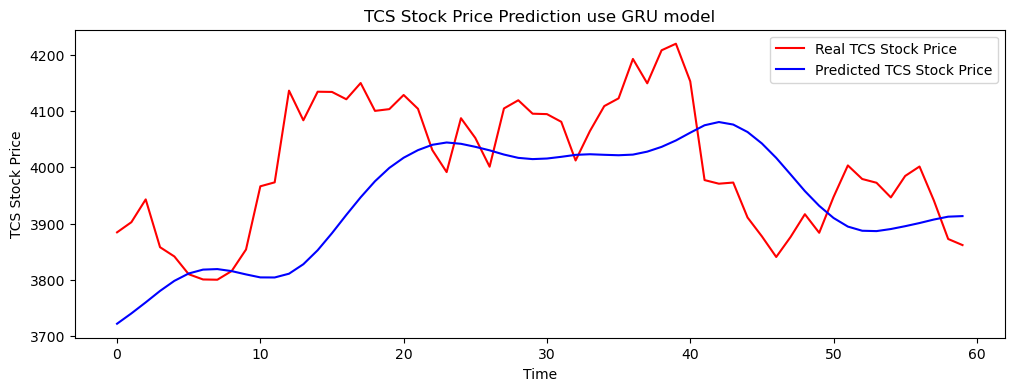

In [32]:
# Visualising the results
plt.figure(figsize=(12,4))
plt.plot(y_test_GRU, color = 'red', label = 'Real TCS Stock Price')
plt.plot(y_pred_GRU, color = 'blue', label = 'Predicted TCS Stock Price')
plt.title('TCS Stock Price Prediction use GRU model')
plt.xlabel('Time')
plt.ylabel('TCS Stock Price')
plt.legend()
plt.show()

## 2.3. Evaluate GRU model

In [43]:
# Calculate RMSE
rmse = np.sqrt(np.mean(((y_pred_GRU - y_test_GRU) ** 2)))
print('Root Mean Squared Error:', rmse)

# Calculate MAPE
mape = np.mean(np.abs((y_test_GRU - y_pred_GRU) / y_test_GRU))

print('Mean Absolute Percentage Error (MAPE):', mape)

Root Mean Squared Error: 125.53880328997293
Mean Absolute Percentage Error (MAPE): 0.025562615611573178


In [44]:
model_GRU.save("gru.keras")